# Figure 4: Creation

### 1. Micromagnetic simulations

Here we recreate a plot from Figure 4 in 

    Beg, M. et al. Stable and manipulable Bloch point. arXiv 1808.10772 (2018).

This notebook uses results from `*.txt` files which are already part of this repository. The script used to generate those files is `src/creation.py`. If you want to rerun micromagnetic simulations, use:

    make creation
    
Micromagnetic simulations will be run inside [Docker](https://www.docker.com/) container, which contains all the necessary software. Therefore, please make sure you have Docker installed on your machine. Installation instructions can be found [here](https://docs.docker.com/install/).

Details about Docker images, VTK, and H5 files can be found in `README.md` file, which is a part of the Github [`marijanbeg/2019-paper-bloch-point-stability`](https://github.com/marijanbeg/2019-paper-bloch-point-stability) repository or in `index.ipynb`.

### 2. Plot
    
We start by reading the results:

In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# geometry parameters
d = 150  # disk diameter (nm)
hb = 20  # bottom layer thickness (nm)
ht = 10  # top layer thickness (nm)

# time array
T = 500e-12  # total simulation time (s)
dt = 1e-12  # time step (s)
t_array = np.arange(0, T+dt/2, dt)/1e-12

mz_top = []
mz_bottom = []
S_top = []
S_bottom = []
for t in t_array:
    basename = 'd{}hb{}ht{}'.format(d, hb, ht)
    rdir = '../results/creation/{}'.format(basename)
    txt_filename = '{}/t{}.txt'.format(rdir, int(t))
    with open(txt_filename, "r") as f:
        data = eval(f.read())

    mz_top.append(data['average_top'][2])
    mz_bottom.append(data['average_bottom'][2])
    S_top.append(data['S_top']/ht)
    S_bottom.append(data['S_bottom']/hb)

Now, we can make the plot:

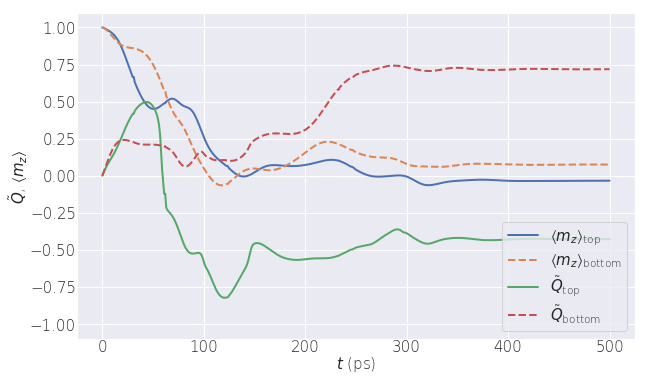

In [2]:
sns.set()
plt.style.use('./customstyle.mplstyle')

plt.figure(figsize=(10, 6))
plt.plot(t_array, mz_top, '-',
         label=r"$\langle m_{z} \rangle_\mathrm{top}$")
plt.plot(t_array, mz_bottom, '--',
         label=r"$\langle m_{z} \rangle_\mathrm{bottom}$")
plt.plot(t_array, S_top, '-', label=r'$\tilde{Q}_\mathrm{top}$')
plt.plot(t_array, S_bottom, '--', label=r'$\tilde{Q}_\mathrm{bottom}$')
plt.xlabel(r"$t$ (ps)")
plt.ylabel(r"$\tilde{Q}$, $\langle m_{z} \rangle$")
plt.ylim([-1.1, 1.1])
plt.legend(loc='lower right');